# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T06:05:54.025218+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

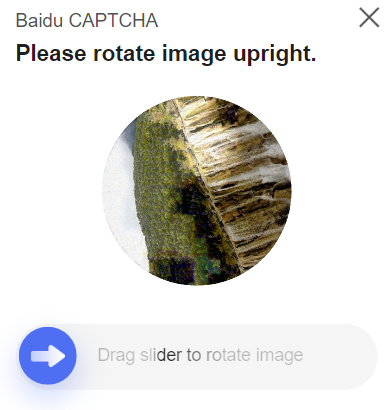

## Objective Identification

In [ ]:
def stage1(frames):
    # Step 1: Provide one-sentence visual description of each frame.
    describe(0, "A CAPTCHA prompt instructing the user to rotate the image upright.")
    describe(1, "A circular image of a landscape with a waterfall and greenery, currently tilted.")
    describe(2, "A slider with an arrow icon and the instruction 'Drag slider to rotate image'.")

    # Step 2: Identify the relationships between frames.
    relate(0, 1, "Frame 0 provides the task instruction for the image in Frame 1.")
    relate(1, 2, "Frame 1 is the target image to be adjusted using the slider in Frame 2.")
    relate(0, 2, "Frame 0 indirectly relates to Frame 2 as the slider is the tool to fulfill the instruction.")

    # Step 3: Identify the sequential events and the final visual criteria.
    objective("Click and drag the slider to rotate the image until the landscape in the circular image appears upright, aligning with the instruction in the CAPTCHA prompt.")

## Structure Abstraction

In [ ]:
def stage2(frames):
    # Frame 0: Instructions, not interactable
    # Frame 1: Image, not interactable
    # Frame 2: Slider, interactable

    # Get the slider element in Frame 2
    slider_element = frames[2].get_element(position='left', details='arrow slider')
    slider_element.set_element_as('SLIDEABLE_X')

## Solution Composition

In [ ]:
def stage3(frames):
    # Get the slider handle from Frame 2
    slider_handle = frames[2].get_interactable(0)

    # Slide the handle to the right while observing changes in Frame 1
    observations = slide_x(slider_handle, direction="right", observe_frame=frames[1])

    # Extract images from observations
    images = [choice.image for choice in observations]

    # Rank the images based on the task objective: rotating the image upright
    ranked_ids = rank(images, task_objective="Rotate the image upright")

    # Select the best choice based on the highest rank
    best_choice = observations[ranked_ids[0]]

    # Refine the search around the best choice
    refined_choices = best_choice.refine()

    # Further rank the refined choices
    refined_images = [choice.image for choice in refined_choices]
    refined_ranked_ids = rank(refined_images, task_objective="Rotate the image upright")

    # Select the best refined choice
    final_choice = refined_choices[refined_ranked_ids[0]]

    # Release the slider at the best position
    final_choice.release()

In [ ]:
PROMPT = '''
Given a list of images, rank them based on their relevance to the objective: Rotate the image upright.
You should follow the format rank(ids=[1, 2, ...]) to output a ranked list of image ids.
## Guidelines
1. Find the image that is the least tiled (the upright image).
'''

Image 0 Image 1 Image 2 Image 3 Image 4 Image 5 Image 6 Image 7 Image 8 Image 9
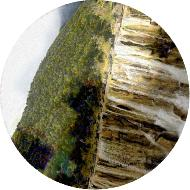
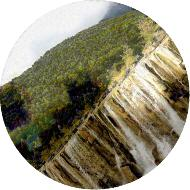
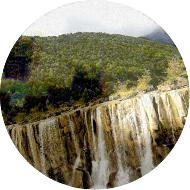
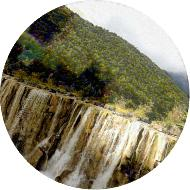
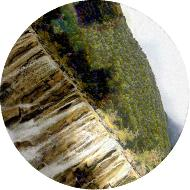
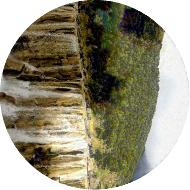
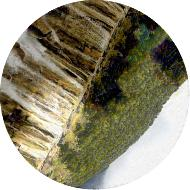
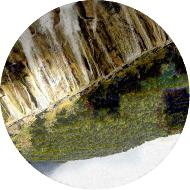
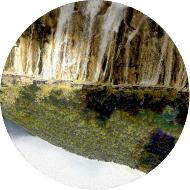
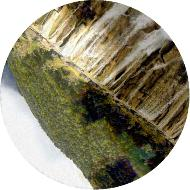

In [ ]:
IMAGES = 10

In [ ]:
RESPONSE = '''
rank(ids=[2, 3, 1, 0, 4, 5, 6, 9, 7, 8])
'''
TIME = 3.752388194669038
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 2463
PROMPT_TOKENS = 2430
COMPLETION_TOKENS = 33

---

In [ ]:
PROMPT = '''
Given a list of images, rank them based on their relevance to the objective: Rotate the image upright.
You should follow the format rank(ids=[1, 2, ...]) to output a ranked list of image ids.
## Guidelines
1. Find the image that is the least tiled (the upright image).
'''

Image 0 Image 1 Image 2 Image 3 Image 4 Image 5 Image 6 Image 7 Image 8 Image 9
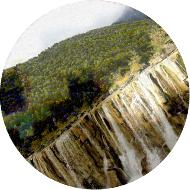
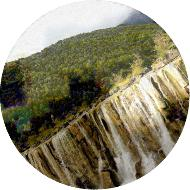
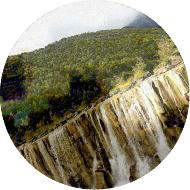
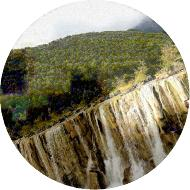
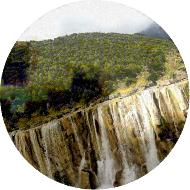
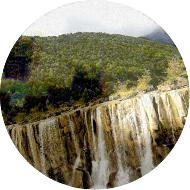
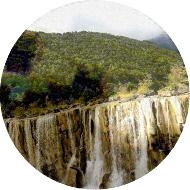
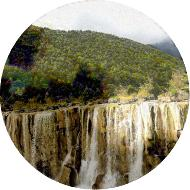
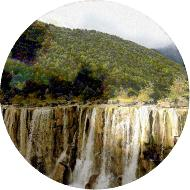
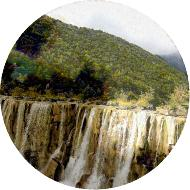

In [ ]:
IMAGES = 10

In [ ]:
RESPONSE = '''
Based on the objective to rank the images by their relevance to being upright, the least tilted image appears to be Image 9, followed by the others in increasing order of tilt. Here's the ranking:

```plaintext
rank(ids=[9, 8, 7, 6, 5, 4, 3, 2, 1, 0])
```
'''
TIME = 3.6298800851218402
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 2507
PROMPT_TOKENS = 2430
COMPLETION_TOKENS = 77

---